In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [ ]:
def load_dataset():

    # Load training dataset
    train_dataset = h5py.File('Train.h5', "r")
    train_set_x_orig = np.array(train_dataset["images"][:])  # Training set features
    train_set_y_orig = np.array(train_dataset["labels"][:])  # Training set labels

    # Load test dataset
    test_dataset = h5py.File('Test.h5', "r")
    test_set_x_orig = np.array(test_dataset["images"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["labels"][:])  # Test set labels

    # Load class names
    classes = np.array(test_dataset["labels"][:])  # List of classes

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

TypeError: 'int' object is not subscriptable

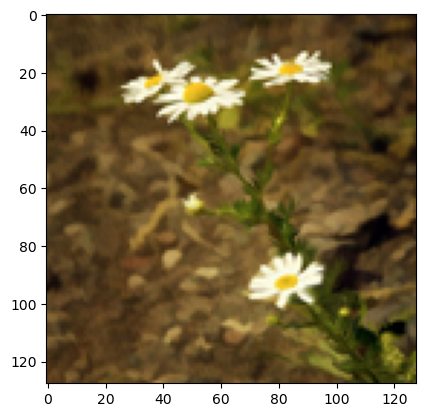

In [ ]:
# Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[:, index]) + ", it's a '" + classes[np.squeeze(train_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
def preprocess_data(train_set_x_orig, test_set_x_orig):
    train_x_flatten = train_set_x_orig.reshape(train_x_orig.shape[0], -1).T
    test_x_flatten = test_set_x_orig.reshape(test_x_orig.shape[0], -1).T

    train_x = train_x_flatten / 255.
    test_x = test_x_flatten / 255.

    return train_x, test_x

In [ ]:
 def softmax( z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
def compute_cost(A, Y):
    m = Y.shape[1]
    epsilon = 1e-10
    A = np.clip(A, epsilon, 1 - epsilon)
    cost = -np.sum(Y * np.log(A)) / m
    return cost


In [ ]:
# Gradient Descent
def gradient_descent(X, Y, learning_rate, num_iterations):
    n_x, m = X.shape
    n_y = Y.shape[0]

    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    for i in range(num_iterations):
        Z = np.dot(W, X) + b
        A = softmax(Z)

        cost = compute_cost(A, Y)

        dZ = A - Y
        dW = np.dot(dZ, X.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m

        W -= learning_rate * dW
        b -= learning_rate * db

        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return W, b

In [ ]:
def predict(W, b, X):
    Z = np.dot(W, X) + b
    A = softmax(Z)
    predictions = np.argmax(A, axis=0)
    return predictions

In [ ]:
def convert_to_one_hot(Y, classes):
    Y_one_hot = np.eye(classes)[Y.reshape(-1)].T
    return Y_one_hot

In [ ]:
train_x_orig, train_y_orig, test_x_orig, test_y_orig ,classes = load_dataset()
train_x, test_x = preprocess_data(train_x_orig, test_x_orig)

In [ ]:
classes = len(np.unique(train_y_orig))
train_y = convert_to_one_hot(train_y_orig, classes)
test_y = convert_to_one_hot(test_y_orig, classes)

In [ ]:
learning_rate = 0.001
num_iterations = 3000
W, b = gradient_descent(train_x, train_y, learning_rate, num_iterations)

Cost after iteration 0: 8.046497969571883
Cost after iteration 100: 22.99254947775485
Cost after iteration 200: 23.003467299646015
Cost after iteration 300: 23.00970564904124
Cost after iteration 400: 23.01364754014244
Cost after iteration 500: 23.014991368124786
Cost after iteration 600: 23.01633519642541
Cost after iteration 700: 23.017082517552854
Cost after iteration 800: 23.017082517552854
Cost after iteration 900: 23.017082517552854
Cost after iteration 1000: 23.017082517552854
Cost after iteration 1100: 23.017082517552854
Cost after iteration 1200: 23.017082517552854
Cost after iteration 1300: 23.017082517552854
Cost after iteration 1400: 23.017082517552854
Cost after iteration 1500: 23.017082517552854
Cost after iteration 1600: 23.017082517552854
Cost after iteration 1700: 23.017082517552854
Cost after iteration 1800: 23.017082517552854
Cost after iteration 1900: 23.017082517552854
Cost after iteration 2000: 23.017082517552854
Cost after iteration 2100: 23.017082517552854
Cost 

In [ ]:
train_predictions = predict(W, b, train_x)
test_predictions = predict(W, b, test_x)

In [ ]:
# Calculate accuracy
train_accuracy = np.mean(train_predictions == np.argmax(train_y, axis=0)) * 100
test_accuracy = np.mean(test_predictions == np.argmax(test_y, axis=0)) * 100

print(f"Train accuracy: {train_accuracy:.2f}%")
print(f"Test accuracy: {test_accuracy:.2f}%")

Train accuracy: 18.09%
Test accuracy: 19.17%
